<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

## Importing necessary libraries

In [2]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

**Observation:**

All the libraries are imported successfully

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive') #Mount the drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank-1.csv')  #Read a csv file located at the path
bankdata = df.copy()  #Create a copy of the Dataframe df and assign it to a variable
bankdata #Displays the dataframe

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Observation:**

Dataframe is displayed

## Data Overview

In [6]:
bankdata.head(10) #Displays first ten rows of the dataframe

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


**Observation:**

Display the first 10 rows of the dataframe

In [7]:
bankdata.tail(10) #Displays last ten rows of the dataframe

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


**Observation:**

Display the last 10 rows of the dataframe

In [8]:
bankdata.shape #shape will return rows & column of data frame

(10000, 14)

**Observation:**

Total number of rows & column present in dataframe are :

1. 10000 rows

2. 14 column

In [9]:
bankdata.info() #Info method, provide quick overview of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observation:**

Following observation are made using data.info

1. There are total of 10000 rows and 14 column in the dataframe

2. There are no missing value present

3. Only three columns (Surname, Geography, Gender) have datatype object

4. Only two column (Balance, EstimatedSalary) have datatype float64

5. Rest all columns (RowNumber, CustomerId, CreditScore, Age, Tenure, NumOfProducts, HasCrCard, IsActiveMember, Exited) have datatype int64

6. Memory usage is : 1.1+ MB

In [10]:
bankdata.isnull().sum() #sum of null values per column

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**Observations:**

Based on the output of the method, the data frame does not contain any missing values. The dataset is complete, with no missing values detected.

In [11]:
bankdata.duplicated().sum() #Used to find and count the number of duplicate rows in the Dataframe

0

**Observation:**

Based on the output of the method, the data frame does not contain any duplicate values.

In [12]:
bankdata.describe(include= 'all').T # used to generate descriptive statistics of the dataframe (.T will transpose the dataframe, swapping rows and columns)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


**Observation:**

By using describe function we can conlcude that:

1. Rownumber, CustomerId, are having unique value. There are 2932 unique surname.

2. Mean Creditscore is 650, median is around 652. which seems that data is not heavily skewed. Max Creditscore is 850.

3. There are 3 unique Geography out of which France is on the Top.

4. There are only two Gender i.e Male and Female out of which Male is on the Top.

5. Mean Age is 38, median age is 37, it also seems that data is not heavely skewed. As max age is aorund 92 which implies that there are some outliers present.

6. Mean Tenure is 5, median is aso 5. and max tenure is 10 it also implies that data is not heavily skewed.

7. Mean balance is 76485, median is 97198, it seems like data is left skewed. Max balance is 250898 which implies that there are outliers present.

8. Mean Numberofproducts is 1.5 , median is 1 which means data is right skewed but not heavely skewed.

9. Mean Hascrcard is 0.7, median is 1. which implies that data is left skewed but not heavely skewed.

10. Mean IsActivemember is 0.5, median is 1. which means data is left skewed but not heavely skewed.

11. Mean Estimatedsalary is 100090, median is 100193. which implies that data is left skewed and also max values is 199992, which shows that there are outliers present.

12. Exited mean value is 0.2, median is 0.0 and max value is 1. which shows that data is right skewed but not heavely skewed.

**Checking the count of each unique value in each column**

In [13]:
bankdata.nunique() #Used to find the number of unique values in each column

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


**Observation:**

1. Rownumber has a total of 10000 unique value.
2. CustomerId  has a total of 10000 unique value.
3. Surname  has a total of 2932 unique value.
4. Creditscore  has a total of 460 unique value.
5. Geography  has a total of 3 unique value.
6. Gender has a total of 2 unique value.
7. Age has a total of 70 unique value.
8. Tenure has a total of 11 unique value.
9. Balance has a total of 6382 unique value.
10. Numberofproducts has a total of 4 unique value.
11. Hascrcard has a total of 2 unique value.
12. IsActiveMember has a total of 2 unique value.
13. Estimatedsalary has a total of 9999 unique value.
14. Exited has a total of 2 unique value.

In [14]:
data = bankdata.drop(labels = ['RowNumber', 'CustomerId', 'Surname'], axis=1)  #Drop the column

**Observation:**

Here we are dropping "RowNumber" , "CustomerId", "Surname" column as it doesnot give any valuable information.

In [15]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Observation:**

Displaying the data after removing the column.

In [16]:
data['Exited'].value_counts(1)

,Exited
0,0.7963
1,0.2037


**Observation:**

1. Customer who will not churn is around ~79%

2. Customer who is going to churn is around ~20%


## Exploratory Data Analysis

### Univariate Analysis

In [17]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [19]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Observation on CreditScore**

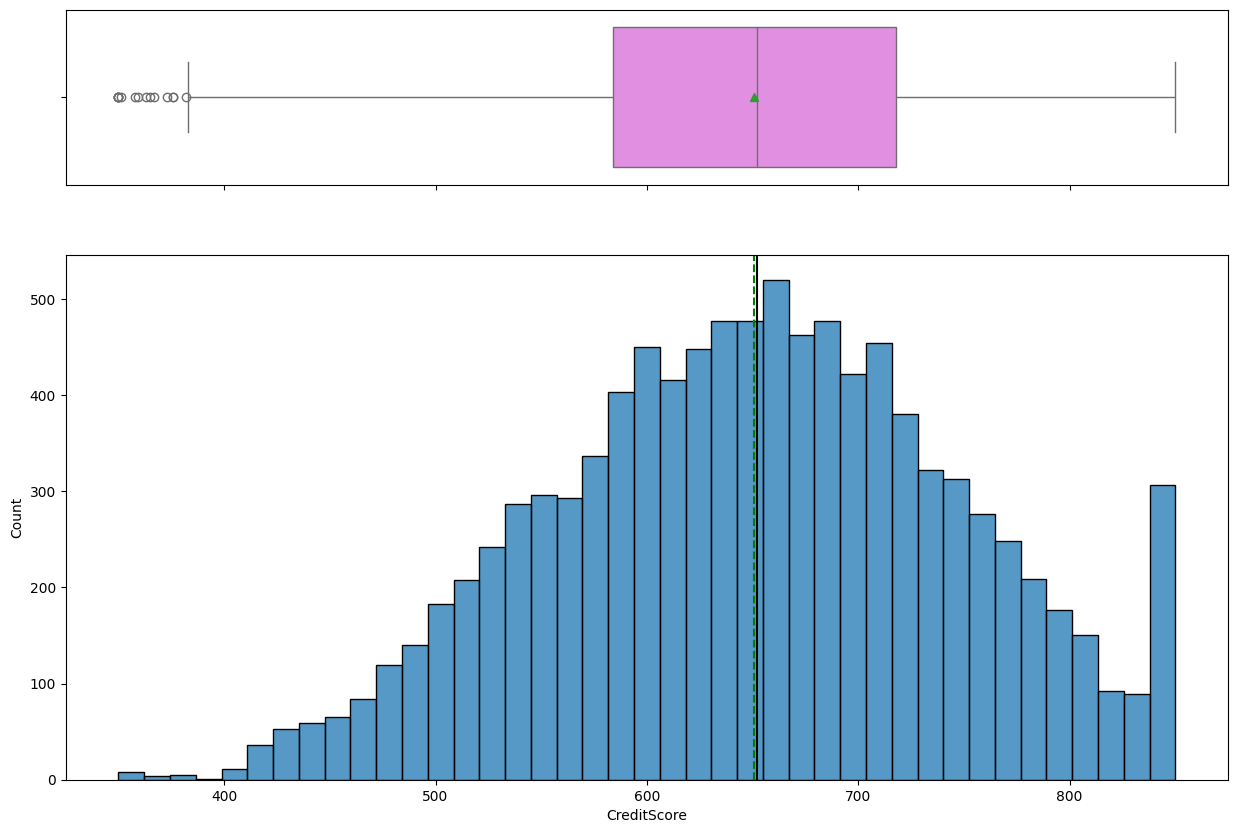

In [20]:
histogram_boxplot(data, "CreditScore") #create and display a histogram and boxplot

Observation:

1. From the above boxplot, it seems like data is not heavily skewed, seems like data is identical. But there are few outliers present beyond the whisker side of the boxplot. Which implies that there are few individual which are having low credit score.

2. From the above histplot, it seems like mostly the creditscore lies between 400 to 800. There are few creditscore lower than 400 and few greater than 800.


**Observation on Age**

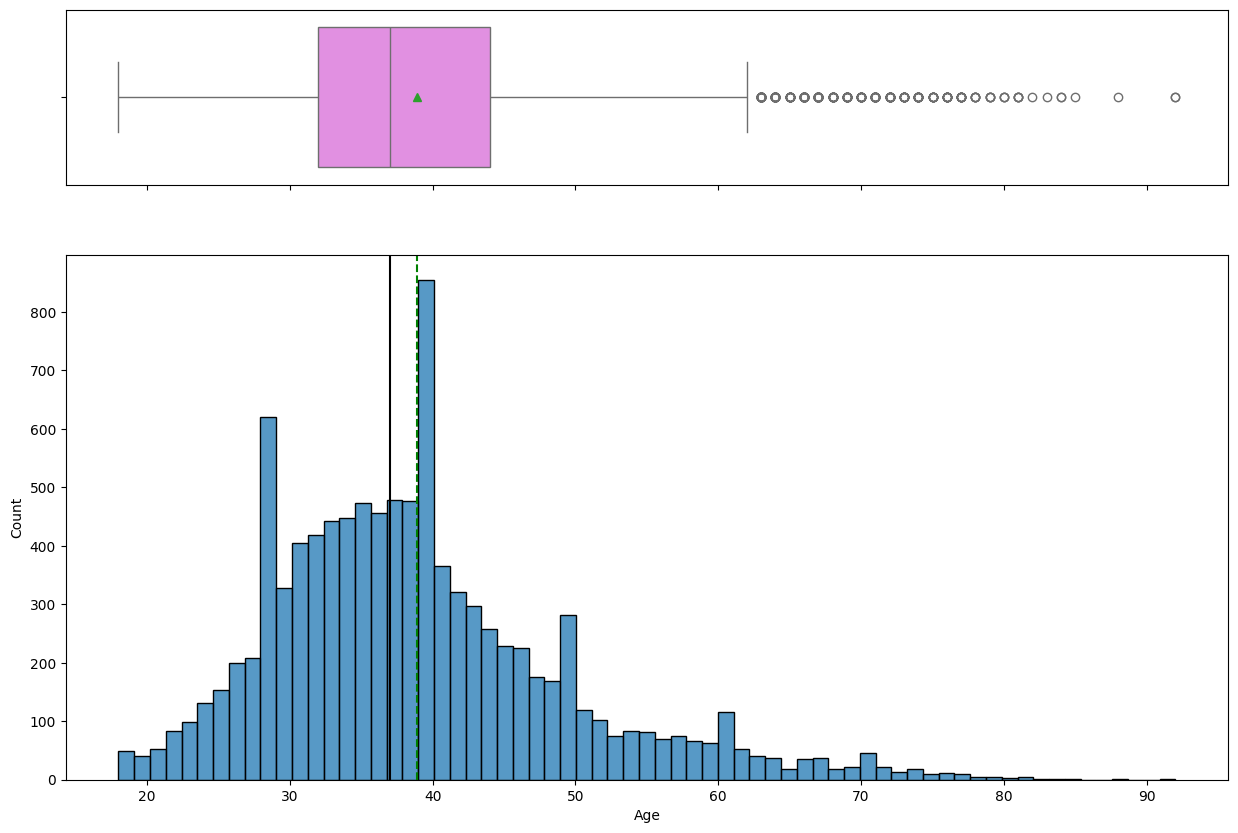

In [21]:
histogram_boxplot(data, "Age") #create and display a histogram and boxplot

**Observation:**

1. From the above Boxplot, it can be concluded that data is slightly right skewed. There are a large number of outliers present beyond the higher wishker of boxplt. Which basically implies that there are some individual which are older in age than rest of the majority.

2. From the Histplot, we can conclude that, maximun individual falls in the age range of 25 to 50. Few are below 25 and some are above 50.


**Observation on Tenure:**

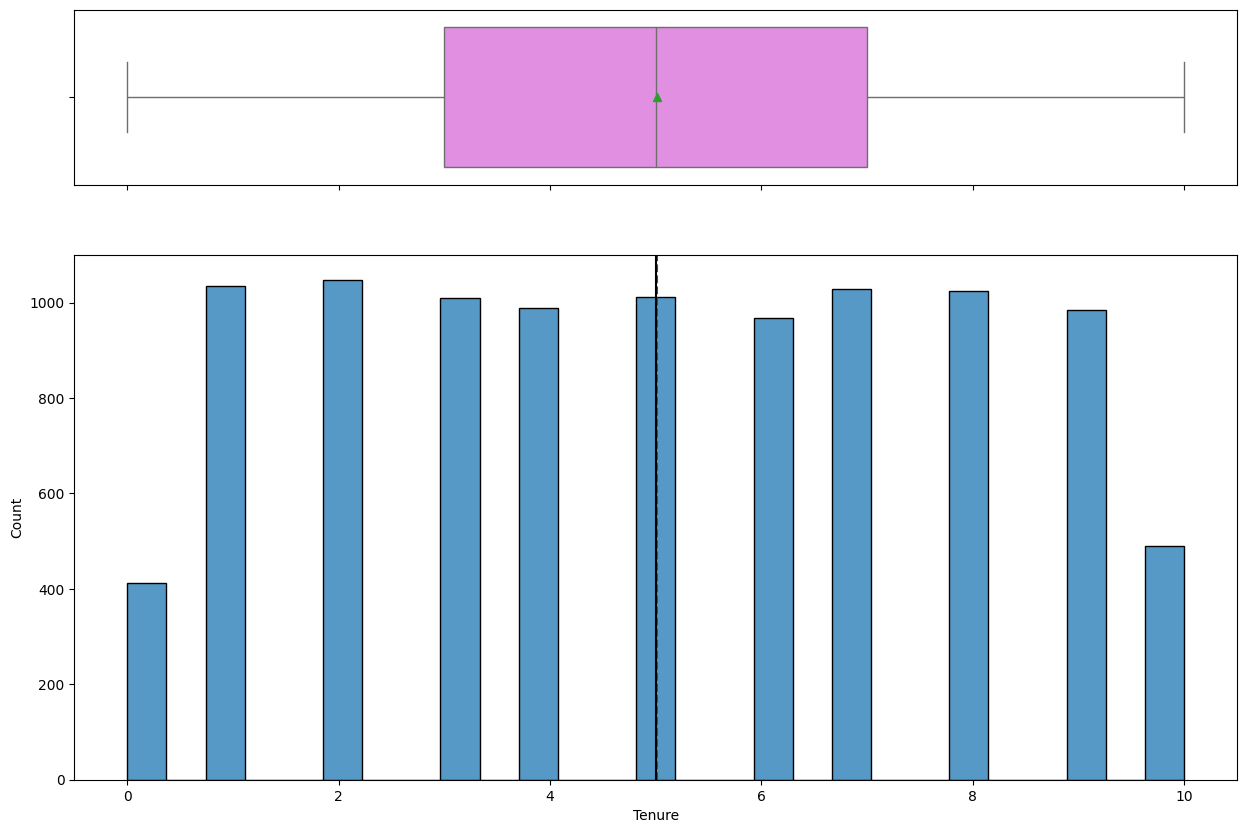

In [22]:
histogram_boxplot(data, "Tenure") #create and display a histogram and boxplot

**Observation:**

1. From the above graph, it seems like data is symmertical . There is no skewness. And there is not any presence of Outliers. WIth a min tenure of 0 and max of 10.



**Observation on Balance:**

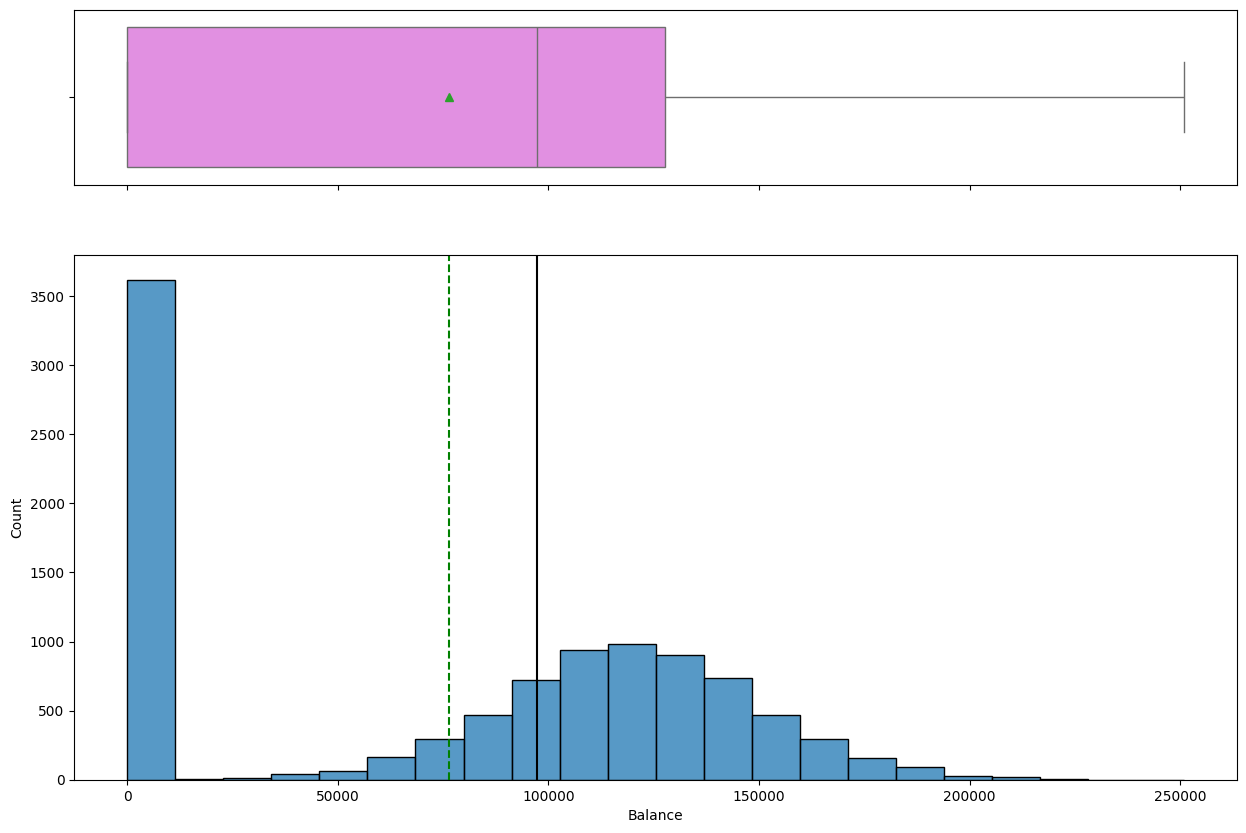

In [23]:
histogram_boxplot(data, "Balance") #create and display a histogram and boxplot

**Observation:**

1. From the above Boxplot, it seems like data is heavely left skewed.

2. From the above Histplot, it seems like most of the people has 0 balance. Few individual has balance in the range of 0 to 50000. Majority people has a balance in the range of 50000 to 180000. Few people has exceptionally high balance beyond 200000.




**Observation on NumOfProducts:**

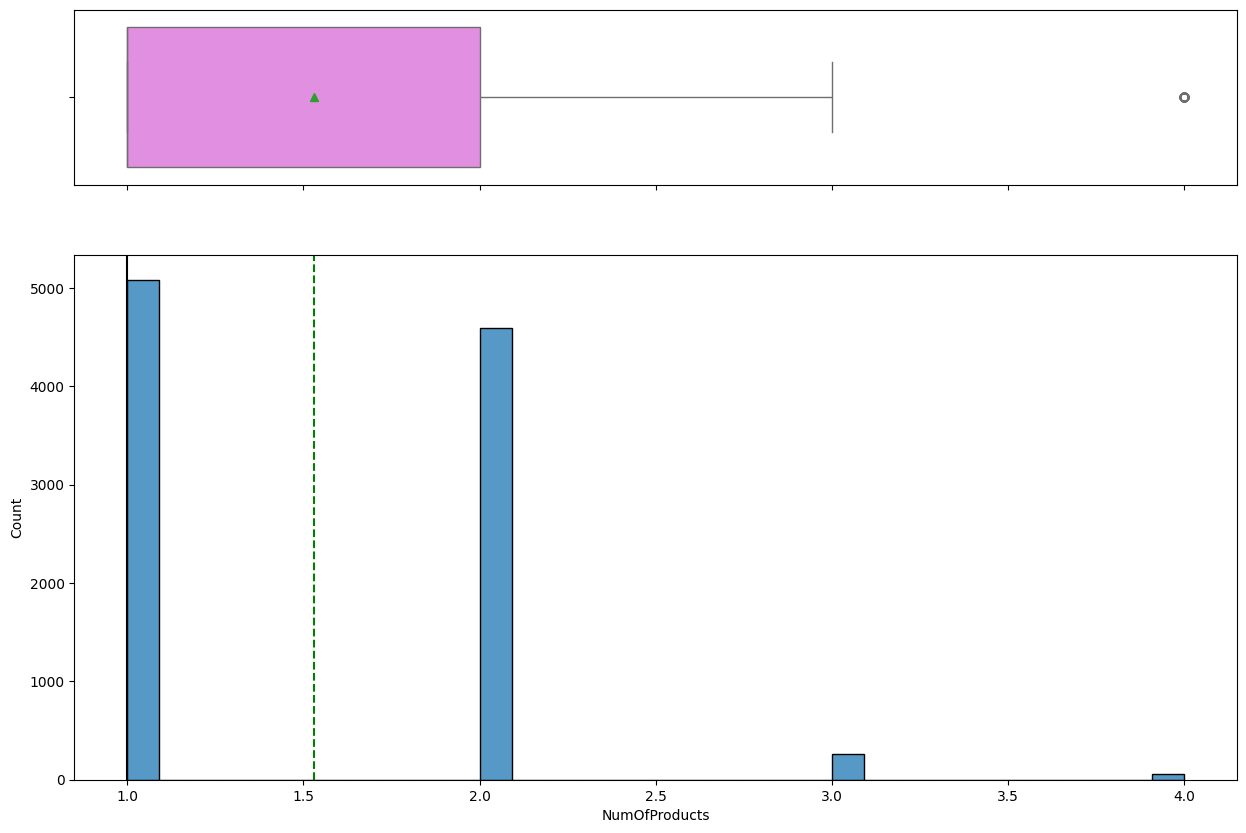

In [24]:
histogram_boxplot(data, "NumOfProducts") #create and display a histogram and boxplot

**Observation:**

1. From the above boxplot, it seems like data is rightly skewed.

2. From the Histplot, it seems like most of the people has 1 or 2 products, only a few has 3 or 4 more products.


**Observation on HasCrCard:**

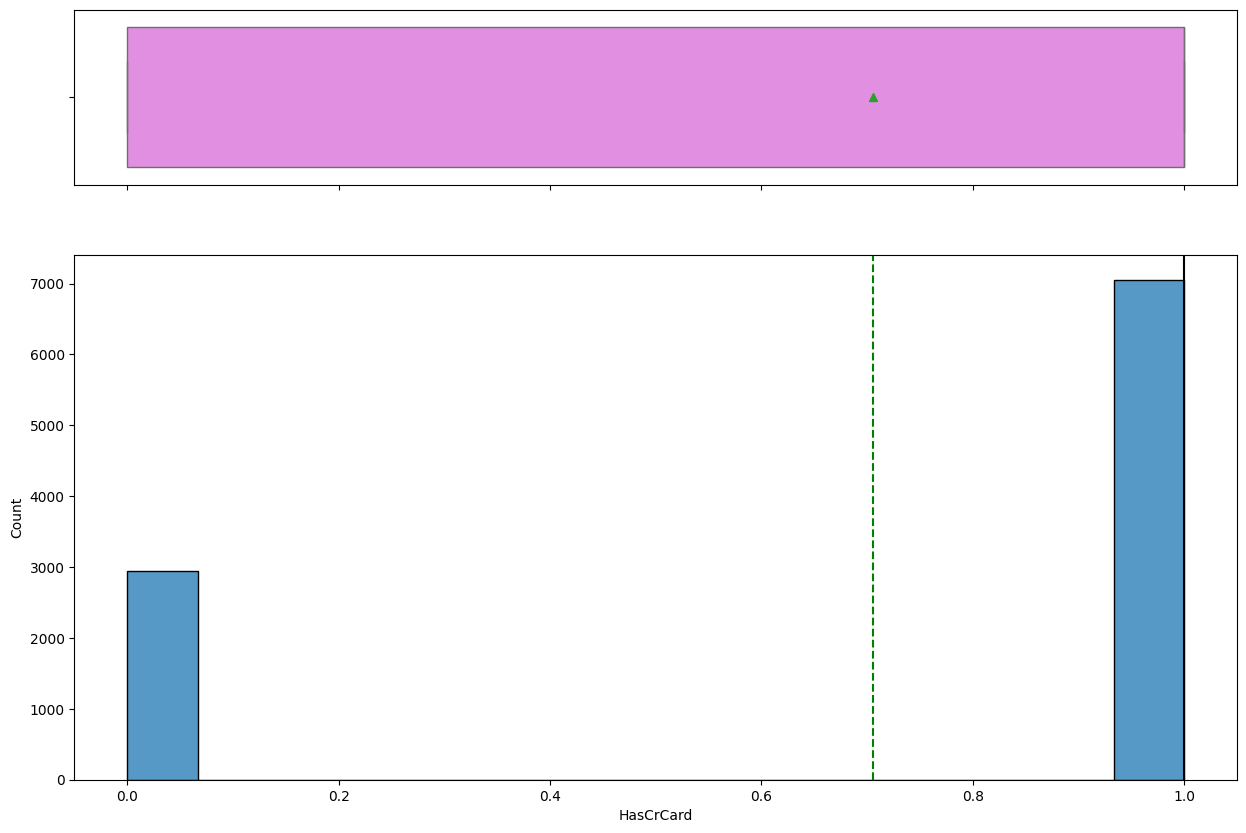

In [25]:
histogram_boxplot(data, "HasCrCard") #create and display a histogram and boxplot

**Observation:**

1. From the Boxplot, it seems like data is heavily left skewed.

2. From the Histplot, it seems like, few like doesnot have creditcard while majority has creditcard.



**Observation on IsActiveMember:**

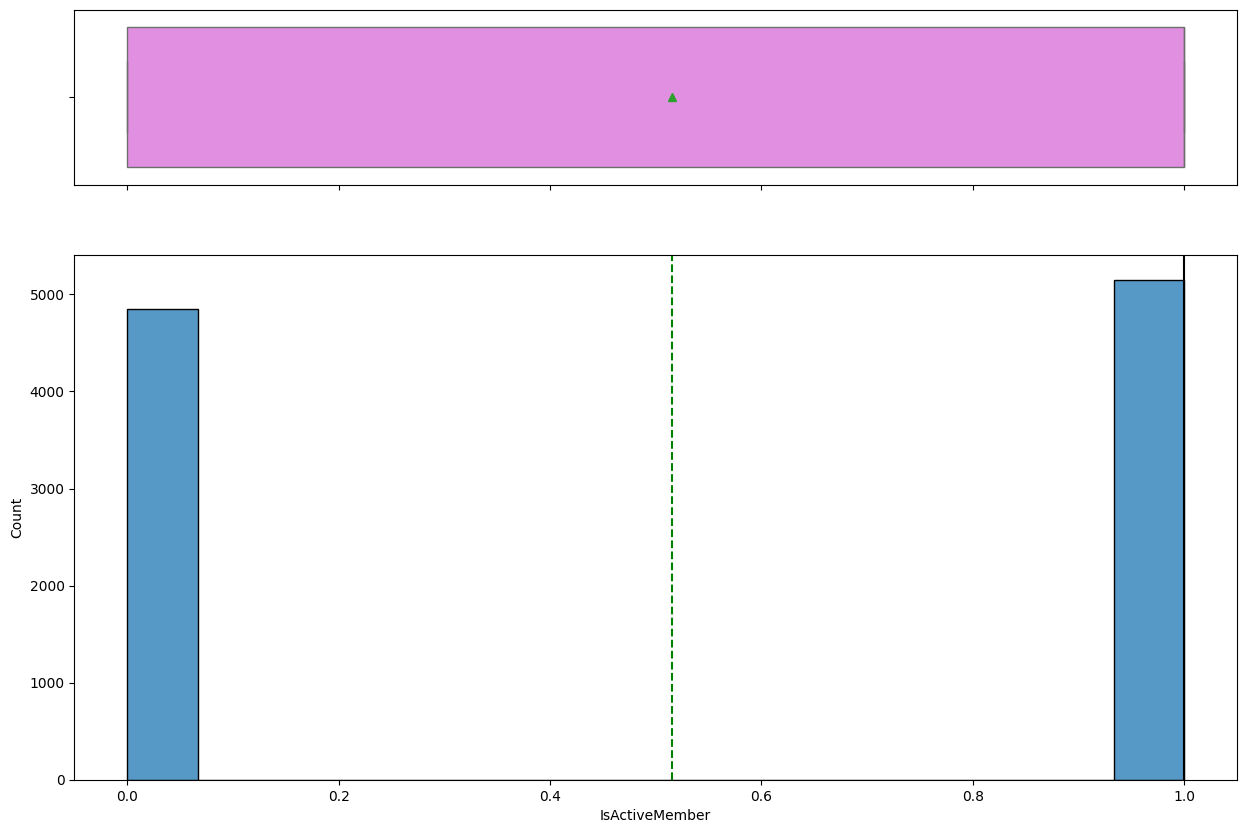

In [26]:
histogram_boxplot(data, "IsActiveMember") #create and display a histogram and boxplot

**Observation:**

1. From the graph above, it seems like data is not heavily skewed. It seems balanced. There are only minor difference between the individual who are active and who are not active.


**Observation on EstimatedSalary:**

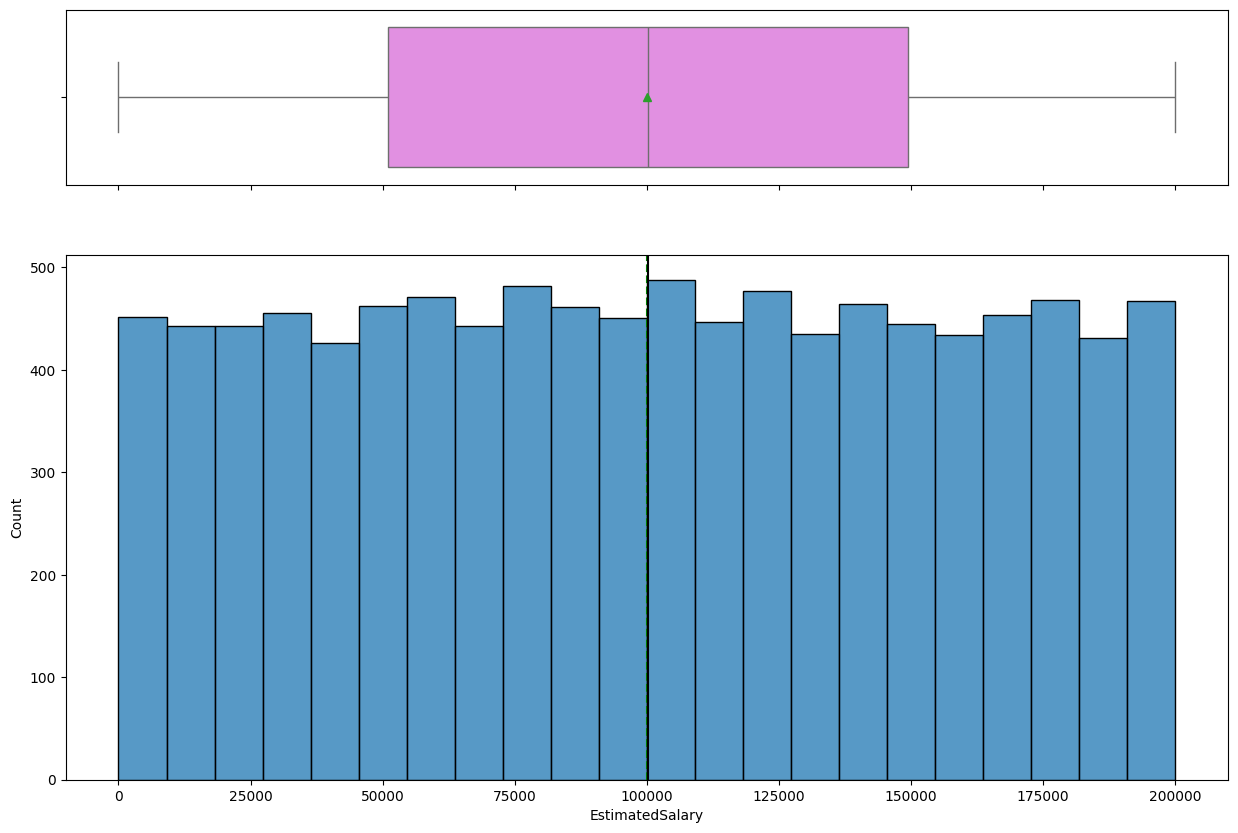

In [27]:
histogram_boxplot(data, "EstimatedSalary") #create and display a histogram and boxplot

**Observation:**

1. From the above graph, nothing much can be predicted. Graph is uniformly distributed. There seems no outliers.


**Observation on Exited:**

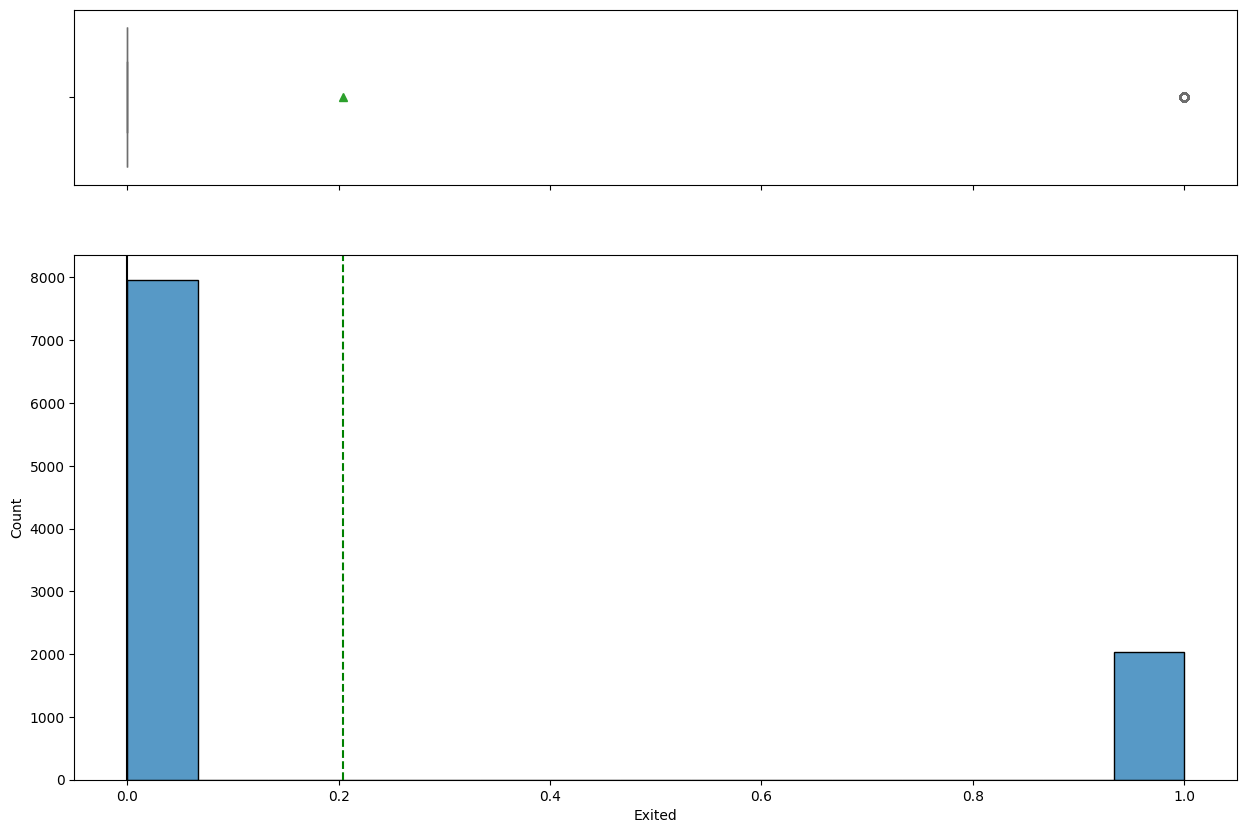

In [28]:
histogram_boxplot(data, "Exited") #create and display a histogram and boxplot

**Observation:**

1. From the above graph, it seems like majority of the customer did not leave the bank but there are few who will leave. Graph seems rightly skewed. It clearly shows the class imbalance problem, where one class which doesnot exit is much larger than the other.


**Observation on Geography:**

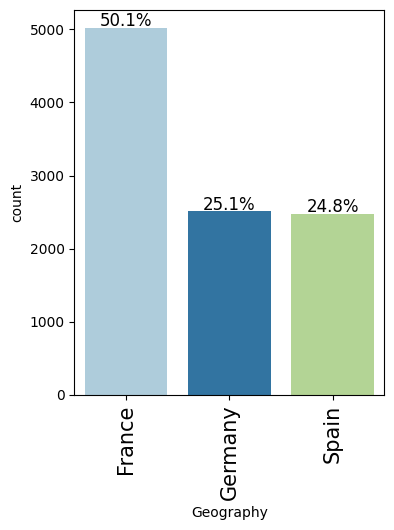

In [29]:
labeled_barplot(data, "Geography", perc=True) #Display labeled barplot

**Observation:**

From the above graph we can conclude that

1. Majority of the individual is from France with 50.1%
2. Second is from Germay with 25.1%
3. Third comes Sapin with 24.8%


**Observation on Gender:**

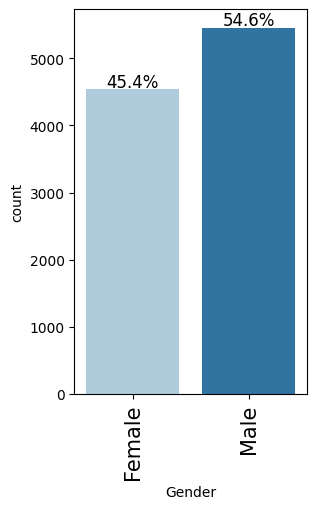

In [30]:
labeled_barplot(data, "Gender", perc=True) #Display labeled barplot

**Observation:**

From the above graph we can conclude that:

1. 54.6% of the individual is Male.
2. 45.4% is Female.

### Bivariate Analysis

In [31]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Heat-Map**

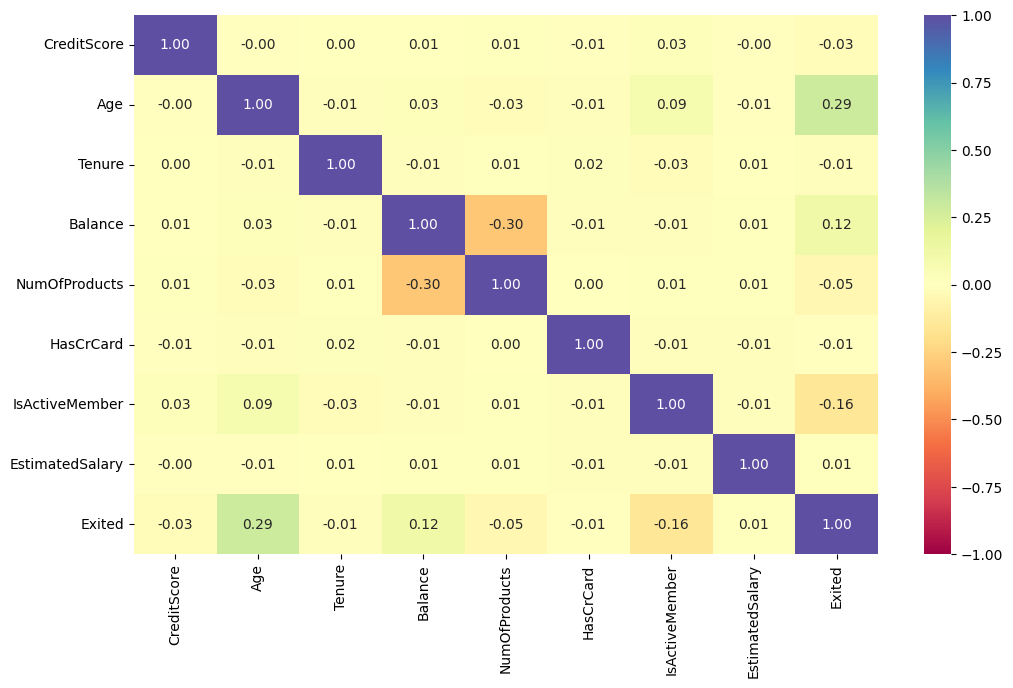

In [32]:
# seperate the numerical values
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# create the correlation matrix
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observation:**

From the above heat map we can conclude that:

1. Age and Exited have a moderate positive correlation (0.29). This suggests that older customers may be more likely to churn.

2. Balance and Exited have a weak positive correlation (0.12). This indicates that customers with higher balances might be slightly more prone to churn.

3. IsActiveMember and Exited have a moderate negative correlation (-0.16). This implies that active members are less likely to churn.


4. Balance and NumberofProducts have a moderate negative correlation(-0.30).


**Observation on Exited vs Geography:**

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


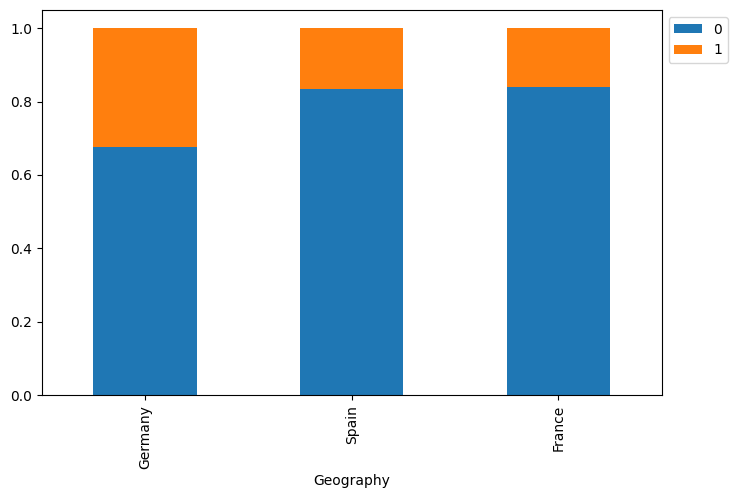

In [33]:
stacked_barplot(data, "Geography", "Exited") #create and display a stacked bar plot

**Observation:**

From the above graph we can conclude that:
1. More people exited from Germay.

2. Spain and France has almost similar exited pattern.


**Observation on Exited vs Gender:**

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


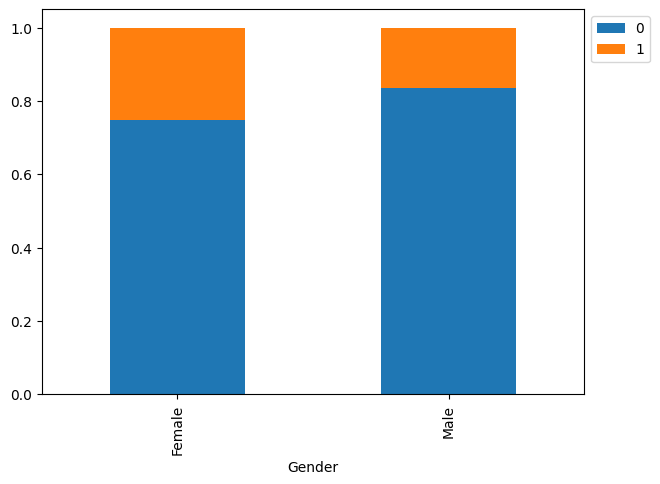

In [34]:
stacked_barplot(data, "Gender", "Exited") #create and display a stacked bar plot

**Observation:**

From the above graph we can conclude that:

1. Female population will churn more than the male.



**Observation on Exited vs NumOfProducts:**

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


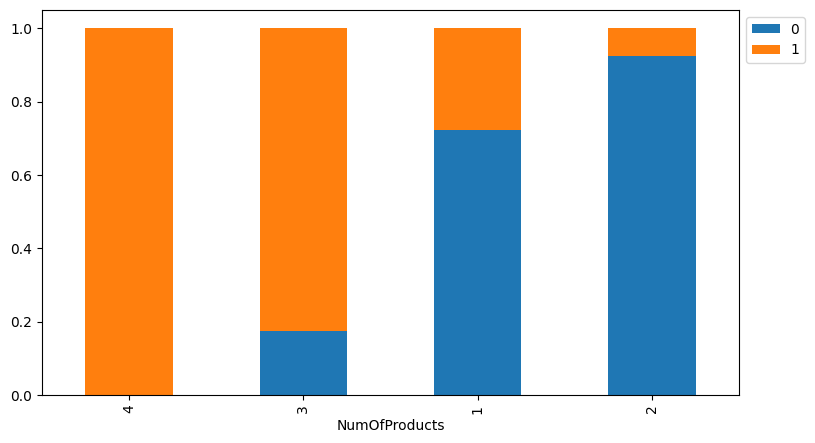

In [35]:
stacked_barplot(data, "NumOfProducts", "Exited") #create and display a stacked bar plot

**Observation:**

From the above graph we can conclude that:

1. Customers with 4 products are most likely to churn

2. Customers with 3 products are also at risk of churn: While not as high as those with 4 products

3. Customers with 2 products are less likely to churn than those with 1 product

**Observation on Exited vs HasCrCard:**

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


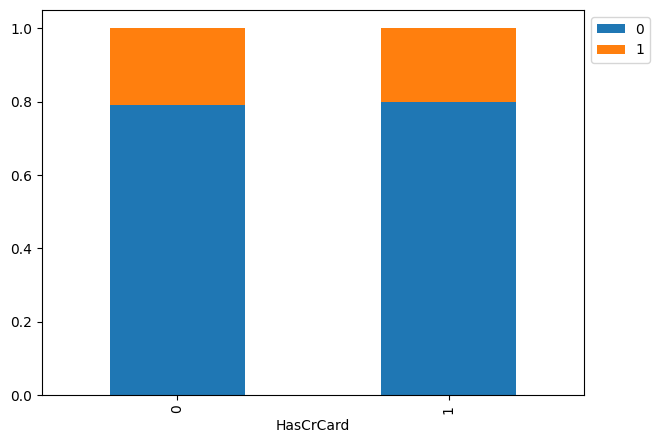

In [36]:
stacked_barplot(data, "HasCrCard", "Exited") #create and display a stacked bar plot

**Observation:**

From the above graph it implies that the customer who has credit card and who doesnot have credit card has similar churning rate.Hence we can concldue that HascrCard doesnot have any impact on customer churning.


**Observation on Exited vs IsActiveMember:**

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


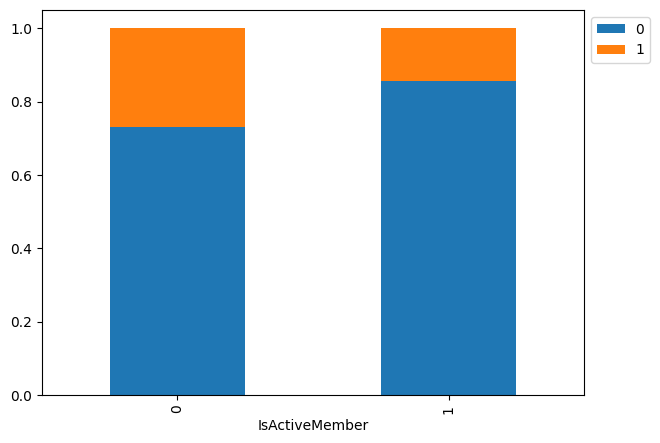

In [37]:
stacked_barplot(data, "IsActiveMember", "Exited") #create and display a stacked bar plot

**Observation:**

From the above graph we can conclude that:

1. Customer who is not an Active member is more likely to churn than the one who is an Active member.



**Observation on Exited vs CreditScore:**

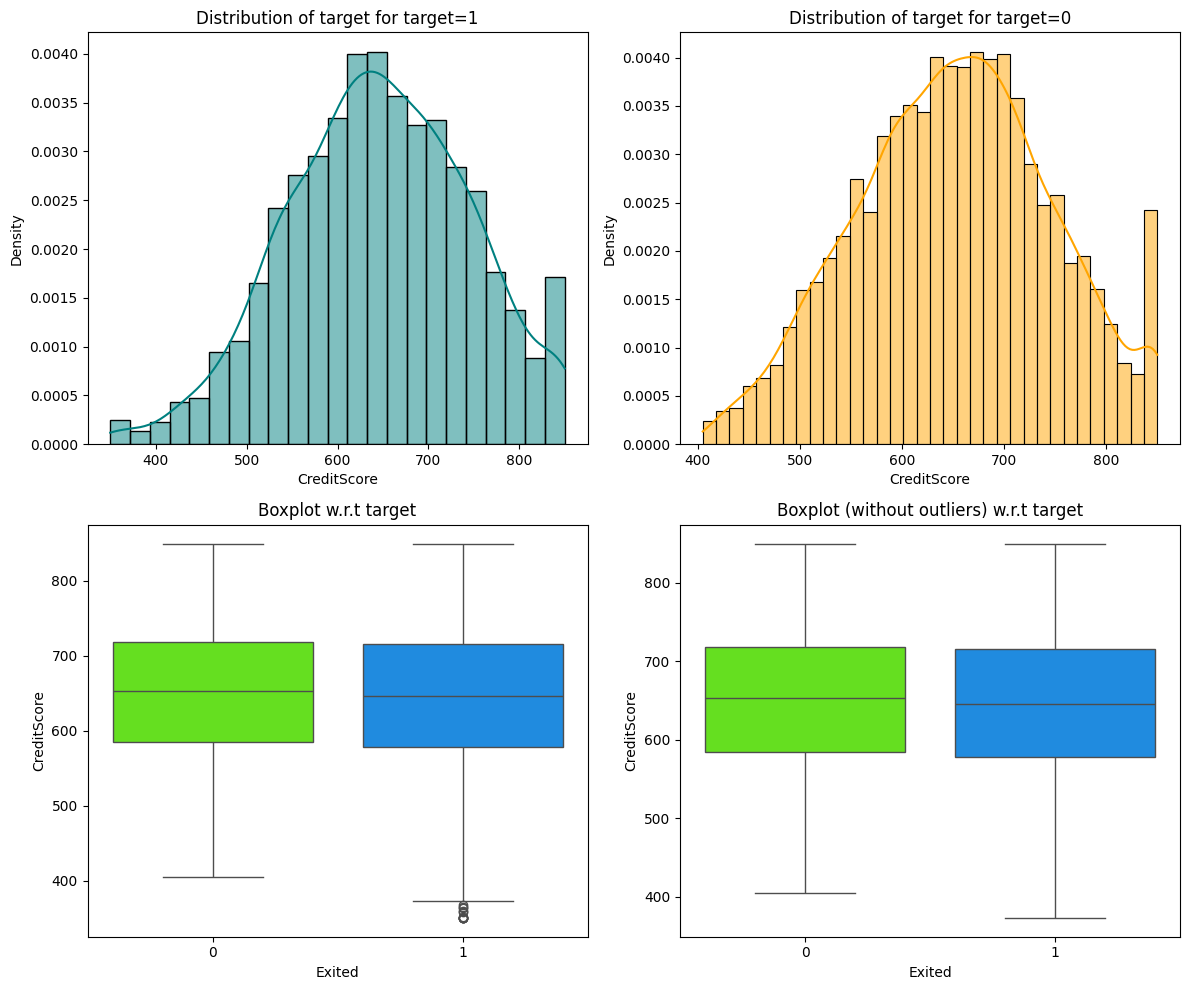

In [38]:
distribution_plot_wrt_target(data, "CreditScore", "Exited") #Create and visualize plot like histogram , boxplot

**Observation:**

From the above graph we can concldue that creditscore is not the potenetial reason for customer churning.



**Observation on Exited vs Age:**

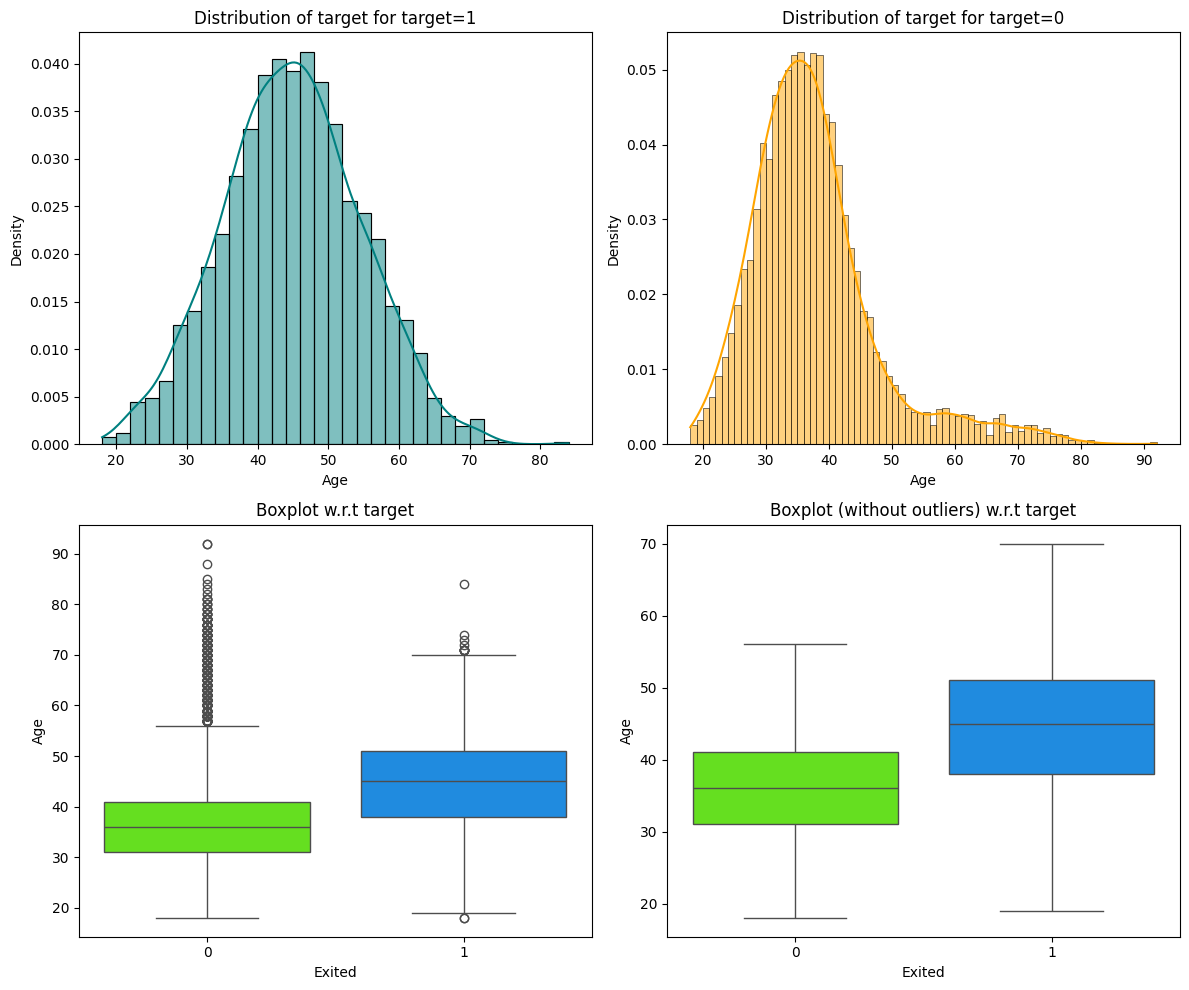

In [39]:
distribution_plot_wrt_target(data, "Age", "Exited") #Create and visualize plot like histogram , boxplot

**Observation:**

From the above graph we can conclude that customer who are older is age is more likely to churn .


**Observation on Exited vs Tenure:**

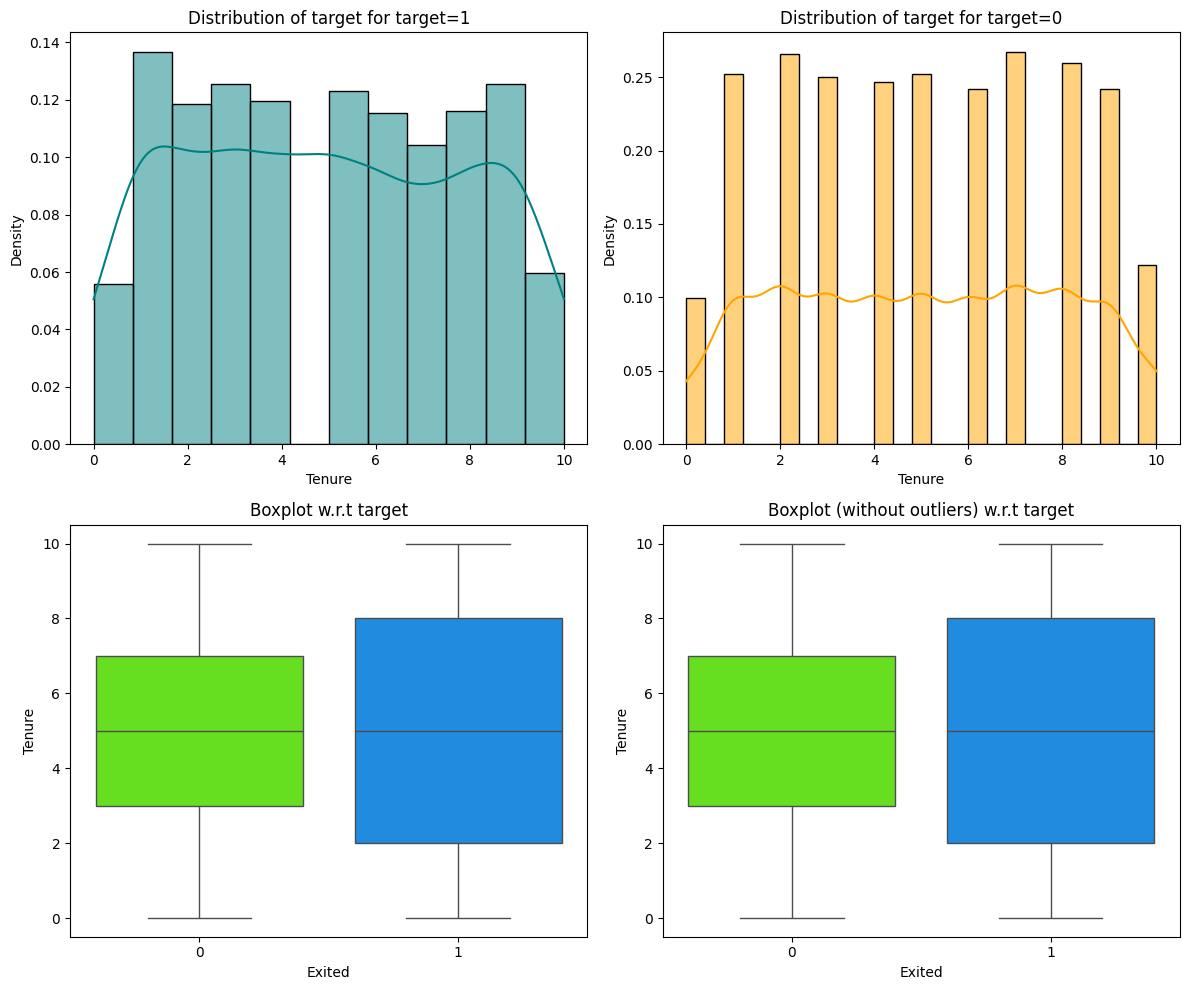

In [40]:
distribution_plot_wrt_target(data, "Tenure", "Exited") #Create and visualize plot like histogram , boxplot

**Observation:**

From the above histplot & Boxplot, the distribution of Tenure is relatively similar for customer who churned and who didnot churned. There wasn't any noticeable difference in the central tendency or spread of tenure between the two groups. There is no clear pattern or trend.



**Observation on Exited vs Balance:**

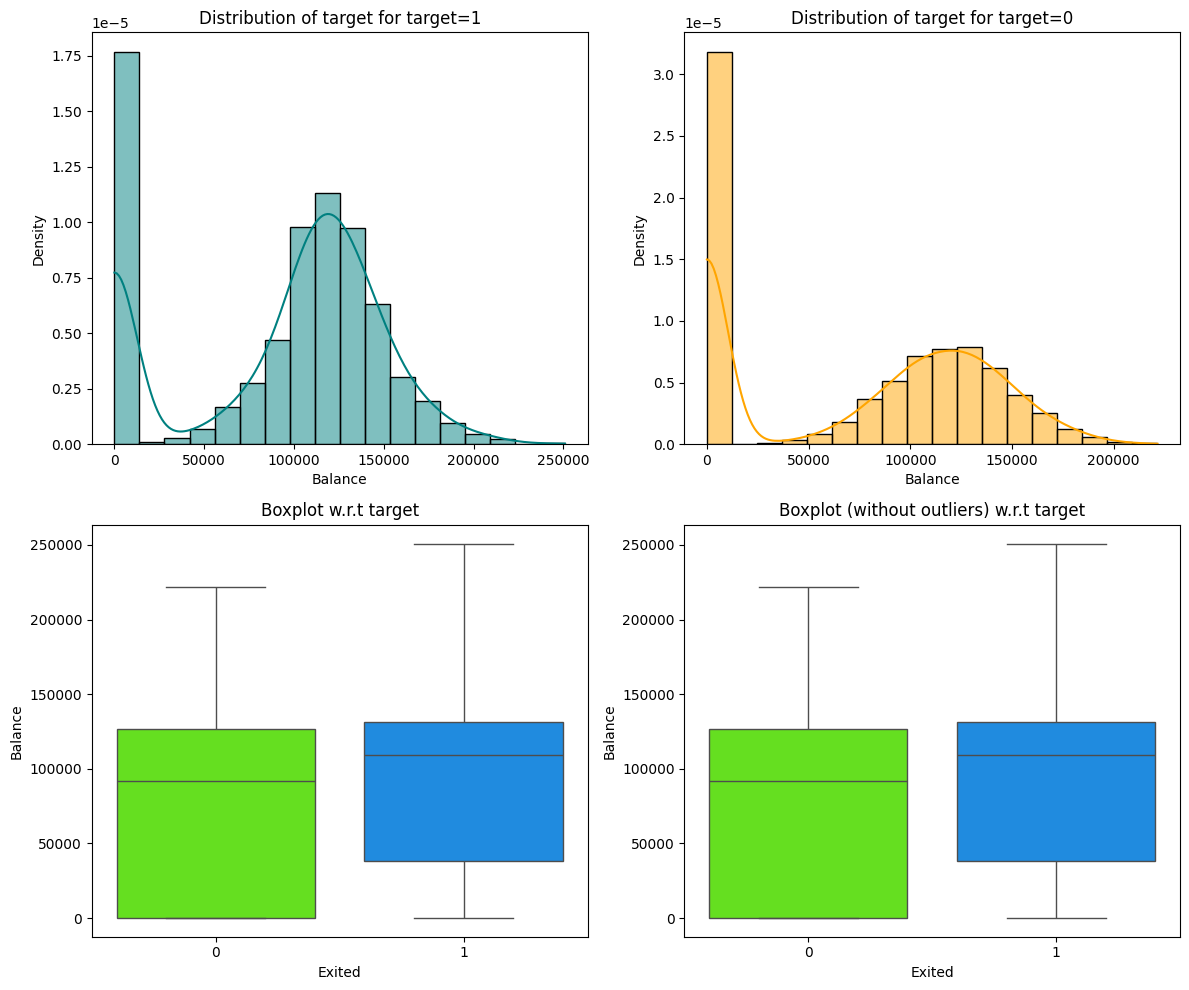

In [41]:
distribution_plot_wrt_target(data, "Balance", "Exited") #Create and visualize plot like histogram , boxplot

**Observation:**

From the above graph we can conclude that customer having higher balance is more likely to churn


**Observation on Exited vs EstimatedSalary:**

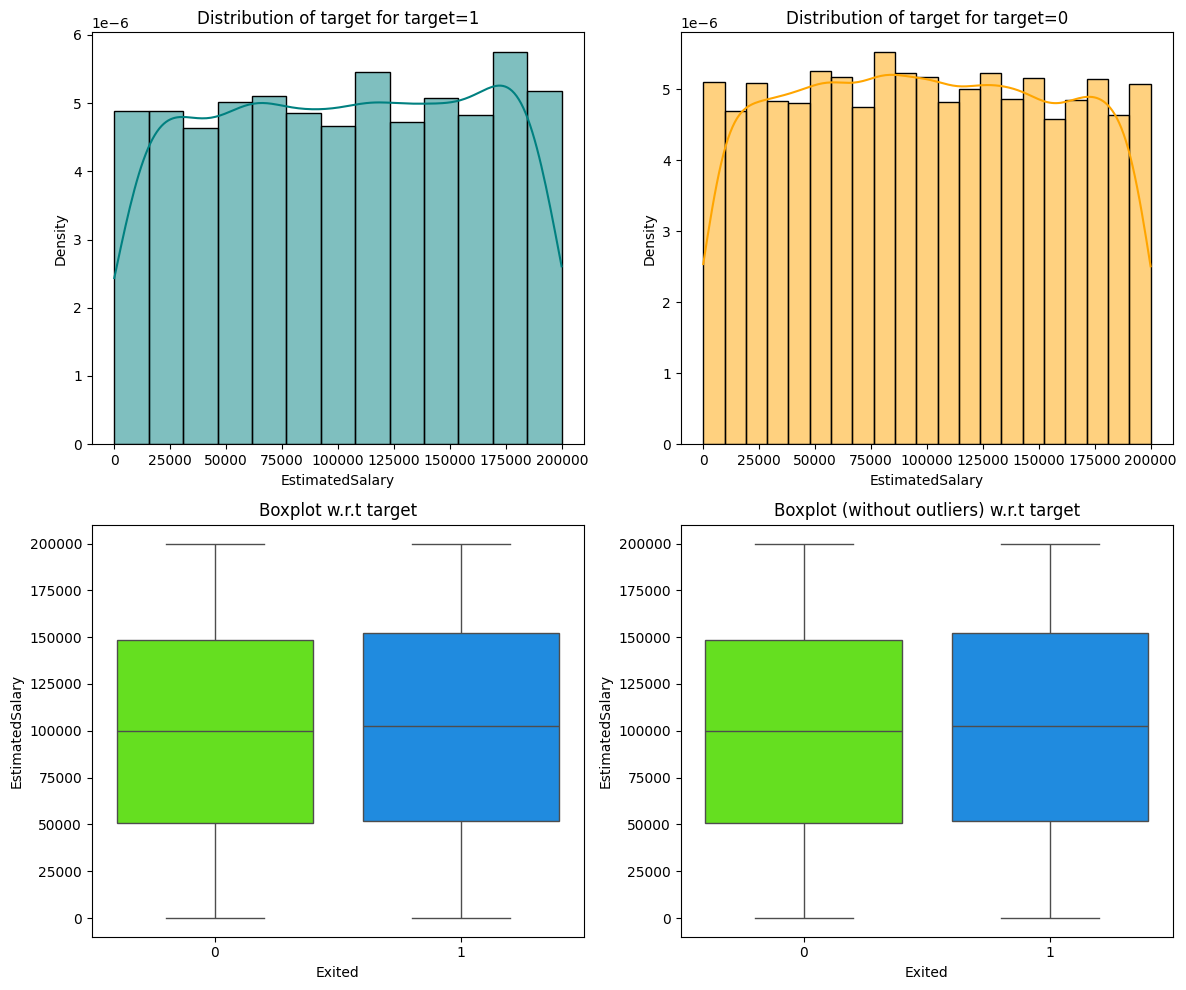

In [42]:
distribution_plot_wrt_target(data, "EstimatedSalary", "Exited") #Create and visualize plot like histogram , boxplot

**Observation:**

From the above graph it seems like Estimated Salary does not seem to affect the customer churn much



## Data Preprocessing

### Dummy Variable Creation

In [43]:
#Converting Categorical feature into Numerical using one hot encoding
datad = pd.get_dummies(data,columns=data.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
datad = datad.astype(float)
datad.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [44]:
X = datad.drop(['Exited'],axis=1)
y = datad['Exited']

In [45]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)

In [46]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [47]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(6400, 11) (6400,)
(1600, 11) (1600,)
(2000, 11) (2000,)


**Observation:**

1. Shape of Training set is 6400.

2. Shape of validation set is 1600.

3. Shape of Testing set is 2000.


### Data Normalization

In [48]:
# creating an instance of the standard scaler
sc = StandardScaler()

cols_list.remove('Exited')

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

**Utility function**

In [49]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [50]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-The primary goal for bank is the "customer churn"  customers leaving and joining another service provider.Customer churn directly impacts a business's bottom line. Identifying churners allows companies to proactively retain customers, build loyalty, and improve satisfaction.

**As per the objectives, below are the metrices which are relevant.**

1. **Accuracy** (This measures the overall correctness of the predictions.)

2. **Precision** (This focuses on how many of the predicted positive cases are actually correct).

3. **Recall** (This focuses on how many of the actual positive cases are correctly identified).

4. **f1-score** (This is the harmonic mean of precision and recall, balancing the trade-off between the two.)

**Model can make wrong predictions as:**

1. **False Positive**: The model predicts that a customer will churn (leave), but the customer doesn't actually churn.

2. **False Negative**: The model predicts that a customer will not churn (stay), but the customer actually churns..

**Which case is more important?**

**False Negatives**: Missing customers who are at risk of churning means you lose valuable clients, which can directly impact revenue, customer base, and long-term growth.

**How to reduce this loss i.e need to reduce False Negatives?**

For this problem, where the emphasis is likely on customer churning, recall is the more critical metric. We need to Prioritize Recall by  Minimizing false negatives, as it ensures most at-risk customers are identified. Businesses can then focus retention efforts on these customers.

Hence **Recall score** is the best choice for us in case of customer churn problem.


As we are dealing with class imbalance problem , Hence we need to defne class weight

In [51]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

### Neural Network with SGD Optimizer

In [52]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [53]:
#Initializing the neural network
model = Sequential() #initialize a Sequentail neural network model
model.add(Dense(64,activation="relu",input_dim=X_train.shape[1])) #add Input layer to the model with 64 neurons and relu as activation function
model.add(Dense(32,activation="relu")) #add hidden layer to the model with 32 neurons and relu as activation function
model.add(Dense(1,activation="sigmoid"))  #add output layer to the model with sigmoid as activation function

In [54]:
model.summary() #Print concise summary of the defined neural network architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

**Observation:**

1. Layer display each layer in the model

2. Output shape, shows the dimension of output data after passing through that layer

3. Number of parameter, calculates and present total trainable and no-trainable parameter in each layer and entire model.

4. Total parameter is 2881, Trainable parameter is 2881 and Non-trainable parameter is 0.




In [55]:
optimizer = tf.keras.optimizers.SGD(0.001)    # defining SGD  optimizer and a learning rate of 0.001
model.compile(loss='binary_crossentropy', optimizer=optimizer) #function is used to configure the learning process of the model before training begins.

**Observation:**

1. Here we are using SGD as the optimizer

In [56]:
epochs = 25 #model will see and learn from the complete training data 25 times
batch_size = 64 #Model will take 64 training example, calculate error and update is weight based on error.

In [57]:
start = time.time() #record current time and store in a variable
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict) #train model with specified parameter.
end=time.time() #record the time after the training is finished in a variable.

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.4396 - val_loss: 0.6827
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4237 - val_loss: 0.6803
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4095 - val_loss: 0.6774
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3967 - val_loss: 0.6741
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3849 - val_loss: 0.6706
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3740 - val_loss: 0.6669
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3636 - val_loss: 0.6633
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3537 - val_loss: 0.6596
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3442 - val_loss: 0.6559
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3350 - val_loss: 0.6522
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3261 - val_loss: 0.6486
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [58]:
print("Time taken in seconds ",end-start) #prinitng the value

Time taken in seconds  13.513165950775146


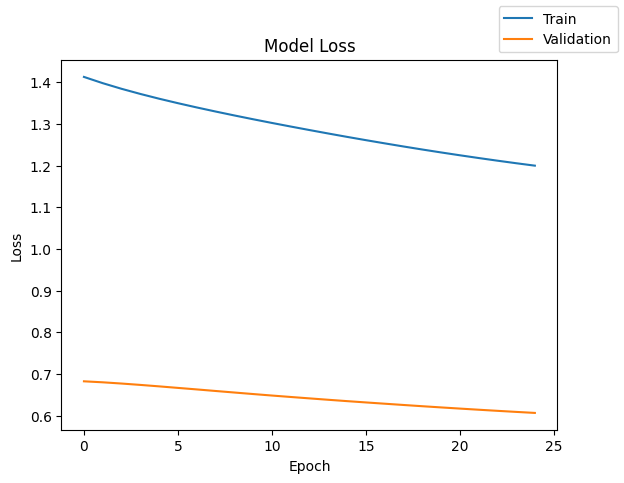

In [59]:
plot(history,'loss') #Plot the training and validation loss over the training epochs

In [60]:
model_0_train_perf = model_performance_classification(model, X_train, y_train) #calculate the performce of trained neural network model on training data
model_0_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.692187,0.692187,0.793833,0.720278


In [61]:
model_0_val_perf = model_performance_classification(model, X_val, y_val) #calculate the performce of trained neural network model on validation data
model_0_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.666875,0.666875,0.771028,0.69731


**Observation:**

With SGD Optimizer, we are getting a training Recall score of ~0.69 and validation Recall score of ~0.66.


## Model Performance Improvement

### Neural Network with Adam Optimizer

In [62]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [63]:
#Initializing the neural network
model = Sequential() #initialize a Sequentail neural network model
model.add(Dense(64,activation="relu",input_dim=X_train.shape[1])) #add input layer to the model with 64 neurons and relu as activation function
model.add(Dense(32,activation="relu")) #add  hidden layer to the model with 32 neurons and relu as activation function
model.add(Dense(1,activation="sigmoid")) #add output layer to the model with sigmiod as activation function

In [64]:
model.summary() #Print concise summary of the defined neural network architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

**Observation:**

1. Layer display each layer in the model

2. Output shape, shows the dimension of output data after passing through that layer

3. Number of parameter, calculates and present total trainable and no-trainable parameter in each layer and entire model.

4. Total parameter is 2881, Trainable parameter is 2881 and Non-trainable parameter is 0.

In [65]:
optimizer = tf.keras.optimizers.Adam(0.001)    # defining Adam as the optimizer and learning rate of 0.001
model.compile(loss='binary_crossentropy', optimizer=optimizer) #function is used to configure the learning process of the model before training begins.

**Observation:**

1. Here we are using Adam as the optimizer


In [66]:
epochs = 25 #model will see and learn from the complete training data 25 times
batch_size = 64 #Model will take 64 training example, calculate error and update is weight based on error.

In [67]:
start = time.time() #record current time and store in a variable
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict) #train model with specified parameter.
end=time.time() #record end time and store in a variable

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3015 - val_loss: 0.5623
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1017 - val_loss: 0.5235
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0309 - val_loss: 0.4949
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9880 - val_loss: 0.4796
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9652 - val_loss: 0.4709
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9507 - val_loss: 0.4665
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9405 - val_loss: 0.4625
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9326 - val_loss: 0.4605
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9260 - val_loss: 0.4580
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9202 - val_loss: 0.4562
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9147 - val_loss: 0.4545
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [68]:
print("Time taken in seconds ",end-start) #printing the value

Time taken in seconds  18.21395707130432


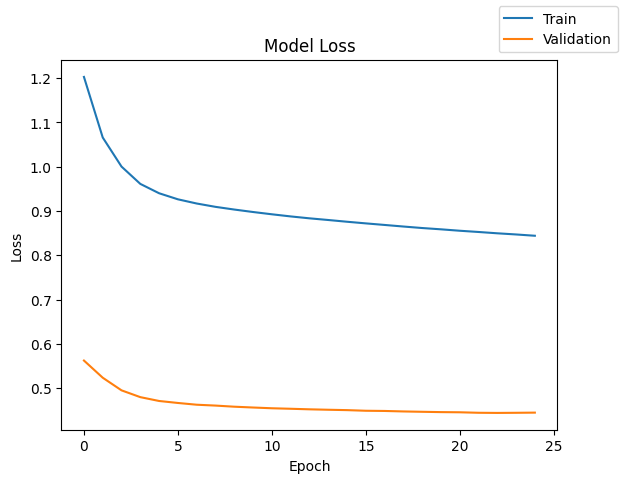

In [69]:
plot(history,'loss') #Plot the training and validation loss over the training epochs

In [70]:
model_1_train_perf = model_performance_classification(model, X_train, y_train) #calculate the performce of trained neural network model on training data
model_1_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.813906,0.813906,0.854291,0.825918


In [71]:
model_1_val_perf = model_performance_classification(model, X_val, y_val) #calculate the performce of trained neural network model on validation data
model_1_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.789375,0.789375,0.830438,0.802663


**Observation:**

With Adam Optimizer, Recall score is little bit better, we are getting a training Recall score of ~0.81 and validation Recall score of ~0.78.


### Neural Network with Adam Optimizer and Dropout

In [72]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [73]:
#Initializing the neural network
model = Sequential()
#input layer with 32 neurons and relu as activation function
model.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# adding dropout of 0.2
model.add(Dropout(0.2))
# Hidden layer with 64 neurons and relu as activation function
model.add(Dense(64,activation='relu'))
# Hidden layer with 32 neurons and relu as activation function
model.add(Dense(32,activation='relu'))
# adding dropout of 0.1
model.add(Dropout(0.1))
# Hidden layer with 16 neurons and relu as activation function
model.add(Dense(16,activation='relu'))
# Output layer with sigmoid as activation function
model.add(Dense(1, activation = 'sigmoid'))

In [74]:
model.summary() #Print concise summary of the defined neural network architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

**Observation:**

1. Layer display each layer in the model

2. Output shape, shows the dimension of output data after passing through that layer

3. Number of parameter, calculates and present total trainable and no-trainable parameter in each layer and entire model.

4. Total parameter is 5121, Trainable parameter is 5121 and Non-trainable parameter is 0.

In [75]:
optimizer = tf.keras.optimizers.Adam(0.001)    # defining Adam as the optimizer and learning rate of 0.001
model.compile(loss='binary_crossentropy', optimizer=optimizer) #function is used to configure the learning process of the model before training begins.

In [76]:
epochs = 25 #model will see and learn from the complete training data 25 times
batch_size = 64 #Model will take 64 training example, calculate error and update is weight based on error.

In [77]:
start = time.time() #record current time and store in a variable
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict) #train model with specified parameter.
end=time.time() #record end time and store in a variable

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.3622 - val_loss: 0.5845
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1714 - val_loss: 0.5573
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1273 - val_loss: 0.5196
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1036 - val_loss: 0.4875
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0661 - val_loss: 0.4843
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0410 - val_loss: 0.4612
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0159 - val_loss: 0.4546
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9967 - val_loss: 0.4540
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9885 - val_loss: 0.4498
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9788 - val_loss: 0.4557
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9912 - val_loss: 0.4435
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [78]:
print("Time taken in seconds ",end-start) #printing the value

Time taken in seconds  16.847631454467773


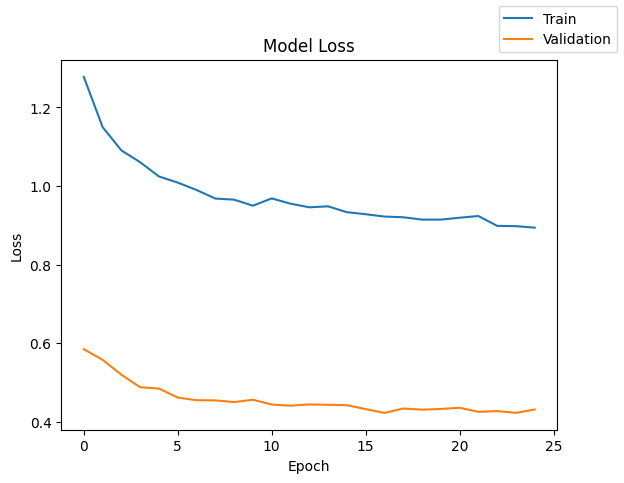

In [79]:
plot(history,'loss') #Plot the training and validation loss over the training epochs

In [80]:
model_2_train_perf = model_performance_classification(model, X_train, y_train) #calculate the performce of trained neural network model on training data
model_2_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.815469,0.815469,0.852012,0.826728


In [81]:
model_2_val_perf = model_performance_classification(model, X_val, y_val)  #calculate the performce of trained neural network model on validation data
model_2_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8025,0.8025,0.837938,0.814095


**Observation:**

With Adam Optimizer & Drop-out, Recall score improves bit by ~0.81, and a validation Recall score is ~0.80

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [82]:
#Import the SMOTE class
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Apply SMOTE to the validation data
X_val_smote, y_val_smote = smote.fit_resample(X_val, y_val)


print('After Applying SMOTE, the shape of X_train: {}'.format(X_train_smote.shape))
print('After Applying SMOTE, the shape of y_train: {}'.format(y_train_smote.shape))




After Applying SMOTE, the shape of X_train: (10192, 11)
After Applying SMOTE, the shape of y_train: (10192,)


In [83]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()



In [84]:
# Initializing the neural network
model = Sequential() #initialize a Sequentail neural network model
model.add(Dense(64, activation="relu", input_dim=X_train_smote.shape[1])) #add input layer to the model with 64 neurons and relu as activation function
model.add(Dense(32, activation="relu")) #add hidden layer to the model with 32 neurons and relu as activation function
model.add(Dense(16, activation="relu")) #add hidden layer to the model with 16 neurons and relu as activation function
model.add(Dense(1, activation="sigmoid")) #add output layer with sigmoid as activation function

In [85]:
model.summary() #Print concise summary of the defined neural network architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

**Observation:**

1. Layer display each layer in the model

2. Output shape, shows the dimension of output data after passing through that layer

3. Number of parameter, calculates and present total trainable and no-trainable parameter in each layer and entire model.

4. Total parameter is 3393, Trainable parameter is 3393 and Non-trainable parameter is 0.

In [86]:
# Defining SGD as the optimizer
optimizer = tf.keras.optimizers.SGD(0.001) #adding SGD as optimizer and learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer=optimizer) #function is used to configure the learning process of the model before training begins.

In [87]:
epochs = 25 #model will see and learn from the complete training data 25 times
batch_size = 64 #Model will take 64 training example, calculate error and update is weight based on error.

In [88]:
start = time.time() #record current time and store in a variable
history = model.fit(X_train_smote, y_train_smote, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs)  #train model with specified parameter.
end = time.time() #record end time and store in a variable

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6866 - val_loss: 0.6667
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6850 - val_loss: 0.6681
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6835 - val_loss: 0.6691
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6820 - val_loss: 0.6699
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6805 - val_loss: 0.6704
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6791 - val_loss: 0.6706
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6776 - val_loss: 0.6706
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6762 - val_loss: 0.6703
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6747 - val_loss: 0.6699
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6732 - val_loss: 0.6692
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6716 - val_loss: 0.6684
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [89]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.733211517333984


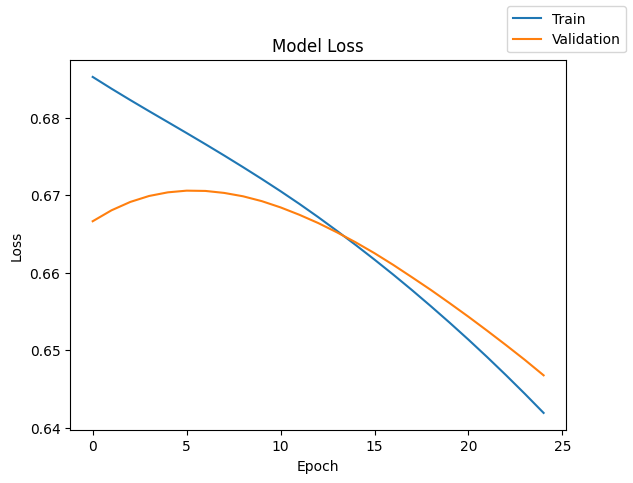

In [90]:
plot(history,'loss') #Plot the training and validation loss over the training epochs

In [91]:
model_3_train_perf = model_performance_classification(model, X_train_smote, y_train_smote) #calculate the performce of trained neural network model on training data
model_3_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.676609,0.676609,0.676653,0.676589


In [92]:
model_3_val_perf = model_performance_classification(model, X_val_smote, y_val_smote) #calculate the performce of trained neural network model on validation data
model_3_val_perf

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.640895,0.640895,0.641041,0.640802


**Observation:**

By applying SMOTE & SGD optimizer, our Recall score again decreases. Training Recall score is ~0.67 and validation Recall score is ~0.64

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [93]:
#Import the SMOTE class
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Apply SMOTE to the validation data
X_val_smote, y_val_smote = smote.fit_resample(X_val, y_val)

print('After Applying SMOTE, the shape of X_train: {}'.format(X_train_smote.shape))
print('After Applying SMOTE, the shape of y_train: {}'.format(y_train_smote.shape))


After Applying SMOTE, the shape of X_train: (10192, 11)
After Applying SMOTE, the shape of y_train: (10192,)


In [94]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [95]:
model = Sequential() #initialize a Sequentail neural network model
model.add(Dense(64, activation="relu", input_dim=X_train_smote.shape[1])) #add input layer to the model with 64 neurons and relu as activatin function
model.add(Dense(32, activation="relu")) #add hidden layer to the model with 32 neurons and relu as activation function
model.add(Dense(16, activation="relu")) #add hidden layer to the model with 16 neurons and relu as activation function
model.add(Dense(1, activation="sigmoid")) #add output layer with sigmoid as activation function

In [96]:
model.summary() #Print concise summary of the defined neural network architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

**Observation:**

1. Layer display each layer in the model

2. Output shape, shows the dimension of output data after passing through that layer

3. Number of parameter, calculates and present total trainable and no-trainable parameter in each layer and entire model.

4. Total parameter is 3393, Trainable parameter is 3393 and Non-trainable parameter is 0.

In [97]:
optimizer = tf.keras.optimizers.Adam(0.001) # defining Adam optimizer and learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer=optimizer) #function is used to configure the learning process of the model before training begins.

In [98]:
epochs = 25 #model will see and learn from the complete training data 25 times
batch_size = 64 #Model will take 64 training example, calculate error and update is weight based on error.

In [99]:
start = time.time() #record current time and store in a variable
history = model.fit(X_train_smote, y_train_smote, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs)  #train model with specified parameter.
end = time.time() #record end time and store in a variable

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6293 - val_loss: 0.5195
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4868 - val_loss: 0.4802
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4523 - val_loss: 0.4677
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4370 - val_loss: 0.4608
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4252 - val_loss: 0.4592
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4155 - val_loss: 0.4593
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4075 - val_loss: 0.4584
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3999 - val_loss: 0.4576
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3918 - val_loss: 0.4549
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3843 - val_loss: 0.4526
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3766 - val_loss: 0.4512
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [100]:
print("Time taken in seconds ",end-start)

Time taken in seconds  19.559712171554565


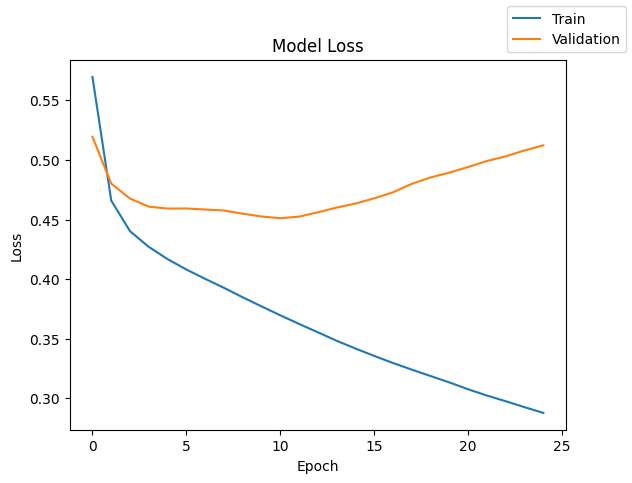

In [101]:
plot(history,'loss') #Plot the training and validation loss over the training epochs

In [102]:
model_4_train_perf = model_performance_classification(model, X_train_smote, y_train_smote) #calculate the performce of trained neural network model on training data
model_4_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.881378,0.881378,0.881638,0.881357


In [103]:
model_4_val_perf = model_performance_classification(model, X_val_smote, y_val_smote) #calculate the performce of trained neural network model on validation data
model_4_val_perf

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.758242,0.758242,0.763502,0.757029


**Observation:**

By Applying SMOTE and Adam optimizer, Recall score improves little bit. Training Recall score is ~0.88 and validation Recall score is ~0.75

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [104]:
#Import the SMOTE class
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Apply SMOTE to the validation data
X_val_smote, y_val_smote = smote.fit_resample(X_val, y_val)

print('After Applying SMOTE, the shape of X_train: {}'.format(X_train_smote.shape))
print('After Applying SMOTE, the shape of y_train: {}'.format(y_train_smote.shape))


After Applying SMOTE, the shape of X_train: (10192, 11)
After Applying SMOTE, the shape of y_train: (10192,)


In [105]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [106]:
#Initializing the model
model = Sequential()
# Add input layer with relu as activation function and 32 neurons
model.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Add dropout rate
model.add(Dropout(0.2))
# Add hidden layer with relu as activation function and 16 neurons
model.add(Dense(16,activation='relu'))
# add dropout rate.
model.add(Dropout(0.1))
# Adding hidden layer with relu as activation function with 8 neurons
model.add(Dense(8,activation='relu'))
# Add output layer with sigmoid as activation function
model.add(Dense(1, activation = 'sigmoid'))

In [107]:
model.summary() #Print concise summary of the defined neural network architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

**Observation:**

1. Layer display each layer in the model

2. Output shape, shows the dimension of output data after passing through that layer

3. Number of parameter, calculates and present total trainable and no-trainable parameter in each layer and entire model.

4. Total parameter is 1057, Trainable parameter is 1057 and Non-trainable parameter is 0.

In [108]:
optimizer = tf.keras.optimizers.Adam() # defining Adam as the optimizer
model.compile(loss='binary_crossentropy', optimizer=optimizer) #function is used to configure the learning process of the model before training begins.

In [109]:
epochs = 25 #model will see and learn from the complete training data 25 times
batch_size = 64 #Model will take 64 training example, calculate error and update is weight based on error.

In [110]:
start = time.time() #record current time and store in a variable
history = model.fit(X_train_smote, y_train_smote, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs) #train model with specified parameter.
end = time.time() #record end time and store in a variable

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6605 - val_loss: 0.5504
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5771 - val_loss: 0.5214
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5486 - val_loss: 0.4878
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5138 - val_loss: 0.4820
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5013 - val_loss: 0.4665
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4946 - val_loss: 0.4615
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4821 - val_loss: 0.4634
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4798 - val_loss: 0.4617
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4694 - val_loss: 0.4532
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4674 - val_loss: 0.4557
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4641 - val_loss: 0.4493
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [111]:
print("Time taken in seconds ",end-start) #printing the value

Time taken in seconds  23.19196653366089


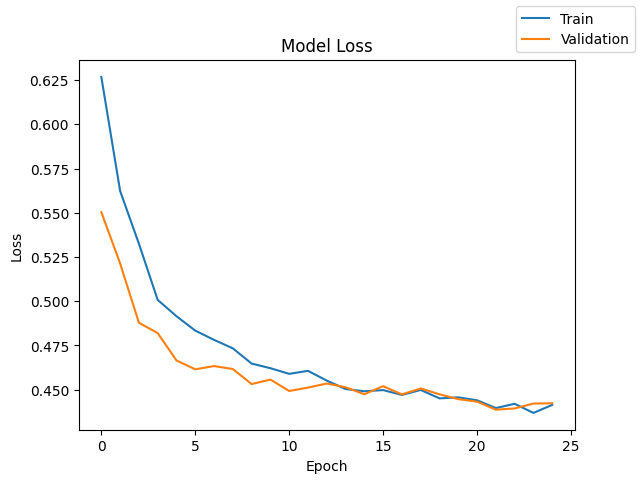

In [112]:
plot(history,'loss') #Plot the training and validation loss over the training epochs

In [113]:
model_5_train_perf = model_performance_classification(model, X_train_smote, y_train_smote) #calculate the performce of trained neural network model on training data
model_5_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.813972,0.813972,0.813972,0.813972


In [114]:
model_5_val_perf = model_performance_classification(model, X_val_smote, y_val_smote) #calculate the performce of trained neural network model on validation data
model_5_val_perf

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.782182,0.782182,0.782372,0.782146


**Observation:**

By Applying SMOTE, Adam optimizer and Drop-out, Recall score improves little bit only. Training Recall score is ~0.81 and validation Recall score is ~0.78

## Model Performance Comparison and Final Model Selection

In [115]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD Optimizer)",
    "Neural Network (Adam Optimizer)",
    "Neural Network (Adam Optimizer, Drop-out)",
    "Neural Network (Smote, SGD Optimizer)",
    "Neural Network (Smote, Adam Optimizer)",
    "Neural Network (Smote, Adam Optimizer, Drop-out)",
]


In [116]:
#Validation performance comparison

models_val_comp_df = pd.concat(
    [
        model_0_val_perf.T,
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Neural Network (SGD Optimizer)",
    "Neural Network (Adam Optimizer)",
    "Neural Network (Adam Optimizer, Drop-out)",
    "Neural Network (Smote, SGD Optimizer)",
    "Neural Network (Smote, Adam Optimizer)",
    "Neural Network (Smote, Adam Optimizer, Drop-out)",
]

In [117]:
models_train_comp_df

,Neural Network (SGD Optimizer),Neural Network (Adam Optimizer),"Neural Network (Adam Optimizer, Drop-out)","Neural Network (Smote, SGD Optimizer)","Neural Network (Smote, Adam Optimizer)","Neural Network (Smote, Adam Optimizer, Drop-out)"
Accuracy,0.692187,0.813906,0.815469,0.676609,0.881378,0.813972
Recall,0.692187,0.813906,0.815469,0.676609,0.881378,0.813972
Precision,0.793833,0.854291,0.852012,0.676653,0.881638,0.813972
F1 Score,0.720278,0.825918,0.826728,0.676589,0.881357,0.813972


In [118]:
models_val_comp_df

,Neural Network (SGD Optimizer),Neural Network (Adam Optimizer),"Neural Network (Adam Optimizer, Drop-out)","Neural Network (Smote, SGD Optimizer)","Neural Network (Smote, Adam Optimizer)","Neural Network (Smote, Adam Optimizer, Drop-out)"
Accuracy,0.666875,0.789375,0.802500,0.640895,0.758242,0.782182
Recall,0.666875,0.789375,0.802500,0.640895,0.758242,0.782182
Precision,0.771028,0.830438,0.837938,0.641041,0.763502,0.782372
F1 Score,0.697310,0.802663,0.814095,0.640802,0.757029,0.782146


**Observation:**

Among all other models, Model 3 (Neural Network model with Adam Optimizer an Drop-out)achieved the highest training and validation scores.

This model has a training Recall score of ~81% and a validation Recall score of 80%

This indicates that the model is likely not overfitting and is generalizing well on unseen data.
We will choose this model as our final model.




**Final Model**

In [119]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [120]:
#Initializing the neural network
model = Sequential()
#input layer with 32 neurons and relu as activation function
model.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# adding dropout of 0.2
model.add(Dropout(0.2))
# Hidden layer with 64 neurons and relu as activation function
model.add(Dense(64,activation='relu'))
# Hidden layer with 32 neurons and relu as activation function
model.add(Dense(32,activation='relu'))
# adding dropout of 0.1
model.add(Dropout(0.1))
# Hidden layer with 16 neurons and relu as activation function
model.add(Dense(16,activation='relu'))
# Output layer with sigmoid as activation function
model.add(Dense(1, activation = 'sigmoid'))

In [121]:
model.summary() #Print concise summary of the defined neural network architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

**Observation:**

1. Layer display each layer in the model

2. Output shape, shows the dimension of output data after passing through that layer

3. Number of parameter, calculates and present total trainable and no-trainable parameter in each layer and entire model.

4. Total parameter is 5121, Trainable parameter is 5121 and Non-trainable parameter is 0.

In [122]:
optimizer = tf.keras.optimizers.Adam(0.001)    # defining Adam as the optimizer and learning rate of 0.001
model.compile(loss='binary_crossentropy', optimizer=optimizer) #function is used to configure the learning process of the model before training begins.

In [123]:
epochs = 25 #model will see and learn from the complete training data 25 times
batch_size = 64 #Model will take 64 training example, calculate error and update is weight based on error.

In [124]:
start = time.time() #record current time and store in a variable
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict) #train model with specified parameter.
end=time.time() #record end time and store in a variable

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.3756 - val_loss: 0.5574
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1931 - val_loss: 0.5226
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.1276 - val_loss: 0.4962
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0738 - val_loss: 0.5012
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0551 - val_loss: 0.4676
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9997 - val_loss: 0.4617
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0047 - val_loss: 0.4625
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9911 - val_loss: 0.4566
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9780 - val_loss: 0.4415
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9797 - val_loss: 0.4431
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9735 - val_loss: 0.4432
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

In [125]:
print("Time taken in seconds ",end-start) #printing the time

Time taken in seconds  19.405182600021362


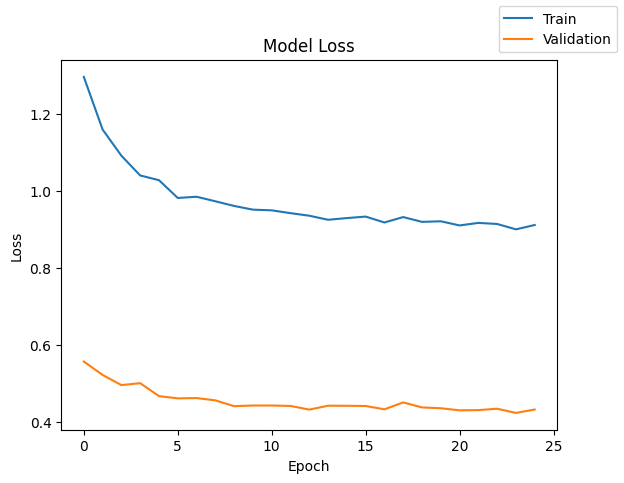

In [126]:
plot(history,'loss') #Plot the training and validation loss over the training epochs

In [127]:
model_train_perf = model_performance_classification(model, X_train, y_train) #calculate the performce of trained neural network model on training data
print("Train performance")
model_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train performance


,Accuracy,Recall,Precision,F1 Score
0,0.807187,0.807187,0.848269,0.819646


In [128]:
model_val_perf = model_performance_classification(model, X_val, y_val) #calculate the performce of trained neural network model on validation data
print("Validation performance")
model_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation performance


,Accuracy,Recall,Precision,F1 Score
0,0.79375,0.79375,0.837754,0.807382


In [129]:
model_test_perf = model_performance_classification(model, X_test, y_test) #calculate the performce of trained neural network model on test data
print("Test performance")
model_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test performance


,Accuracy,Recall,Precision,F1 Score
0,0.7915,0.7915,0.838235,0.805738


**Observation:**

The Recall score on the test data is ~0.79

A recall score of 0.79 indicates a moderately good performance in identifying churners.


In [130]:
y_train_pred = model.predict(X_train) #Generate predictions using trained neural network model on train data
y_val_pred = model.predict(X_val) #Generate predictions using trained neural network model on validation data
y_test_pred = model.predict(X_test) #Generate predictions using trained neural network model on test data

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [131]:
print("Classification Report - Train data",end="\n\n") #printing classification report on Training data
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87      5096
         1.0       0.52      0.77      0.62      1304

    accuracy                           0.81      6400
   macro avg       0.73      0.79      0.75      6400
weighted avg       0.85      0.81      0.82      6400



In [132]:
print("Classification Report - Validation data",end="\n\n") #printing classiication report on validation data
cr = classification_report(y_val,y_val_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

         0.0       0.93      0.81      0.86      1274
         1.0       0.50      0.75      0.60       326

    accuracy                           0.79      1600
   macro avg       0.71      0.78      0.73      1600
weighted avg       0.84      0.79      0.81      1600



In [133]:
print("Classification Report - Test data",end="\n\n") #printing classification report on test data
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      1593
         1.0       0.49      0.75      0.59       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.81      2000



**Observation:**

The Recall score on the test data is ~0.75 for class 1.0, which means that the model correctly identified 75% of the customer who actually churned.




## Actionable Insights and Business Recommendations

**Key Insights**
1. Customers in Germany are more prone to churn compared to those in France or Spain. This could be driven by competitive market dynamics, economic factors, or unique service preferences in Germany.

2. Female customers exhibit a higher churn rate than male customers, potentially indicating unmet needs or expectations among female clients.

3. Customers with 4 products have the highest likelihood of churning, suggesting potential risks tied to over-diversification.

4. Customers with higher balances but reduced activity show significant churn risk, emphasizing the importance of maintaining customer engagement.

5. Older customers are more likely to churn than younger ones, indicating the need for age-specific retention strategies.

**Business Recommendation**

1. Focus retention efforts on German customers through:

  - Personalized offers tailored to their preferences.

  - Loyalty programs that reward long-term commitment.

  - Enhanced customer support to address specific concerns and foster trust.

2. Address Gender-Specific Needs:

  - Develop initiatives to understand and cater to the preferences of female customers.

3. Reduce Product Diversification Risks:

  - Identify potential challenges faced by customers with multiple products and simplify offerings where necessary.

  - Offer specialized support or benefits for customers with diversified product portfolios.

4. Engagement for High-Balance Inactive Customers:

  - Launch premium loyalty programs or exclusive services targeting customers with high balances.

  - Use personalized outreach campaigns to re-engage inactive customers effectively.

5. Build Long-Term Relationships with Younger Customers:

  - Design engagement strategies aimed at younger demographics, such as loyalty programs or mobile-friendly platforms.

  - Develop campaigns to attract younger customers into staying connected over the years.

<font size=6 color='blue'>Power Ahead</font>
___